### Correlation Between Vaccination Rates and Covid Case, Hospitalization and Death Rates### 


Using data from *The New York Times'* [online Covid tracking tool](https://www.nytimes.com/interactive/2021/us/covid-cases.html) from January 10, 2022, this notebook takes a high-level look at correlations between vaccination rates and case, hospitalization and death rates in the 50 U.S. states and Washington, D.C.   It finds no meaningful correlation between vaccination rates and hospitalization and death rates, and a weak *positive* correlation with case rates, suggesting a higher case rate among the vaccinated.   This analysis is subject to many caveats, including that it reflects just a single point in time and that the data is not adjusted for demographics and underlying health factors.  But it is consistent with several recent studies finding little or no association between vaccination rates and Covid case, hospitalization and death rates. 

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
pd.options.display.max_rows = 999
pd.set_option('display.max_columns', 500)
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [2]:
df=pd.read_excel("covid_vacc_correl_01_10_22.xls", index_col="Unnamed: 0")
df.head()

,Cases DAILY AVG.,Cases per 100000,14-day CHANGE,HOSPITALIZED DAILY AVG.,HOSPITALIZED per 100000,HOSPITALIZED 14-day CHANGE,DEATHS DAILY AVG.,DEATHS PER 100000,FULLY VACCINATED
United States,677243,204,2.15,131361,40,0.82,1559.4,0.47,0.62
Rhode Island ›,4371,413,2.16,435,41,0.58,6.9,0.65,0.77
New York ›,74182,381,1.28,12082,62,1.18,133.0,0.68,0.72
New Jersey ›,31512,355,1.25,5960,67,1.39,57.1,0.64,0.71
Massachusetts ›,19902,289,1.78,2556,37,0.91,42.1,0.61,0.75


In [3]:
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')
df.head()

,cases_daily_avg.,cases_per_100000,14-day_change,hospitalized_daily_avg.,hospitalized_per_100000,hospitalized_14-day_change,deaths_daily_avg.,deaths_per_100000,fully_vaccinated
United States,677243,204,2.15,131361,40,0.82,1559.4,0.47,0.62
Rhode Island ›,4371,413,2.16,435,41,0.58,6.9,0.65,0.77
New York ›,74182,381,1.28,12082,62,1.18,133.0,0.68,0.72
New Jersey ›,31512,355,1.25,5960,67,1.39,57.1,0.64,0.71
Massachusetts ›,19902,289,1.78,2556,37,0.91,42.1,0.61,0.75


In [4]:
df.columns

Index(['cases_daily_avg.', 'cases_per_100000', '14-day_change',
       'hospitalized_daily_avg.', 'hospitalized_per_100000',
       'hospitalized_14-day_change', 'deaths_daily_avg.', 'deaths_per_100000',
       'fully_vaccinated'],
      dtype='object')

In [5]:
df.head()

,cases_daily_avg.,cases_per_100000,14-day_change,hospitalized_daily_avg.,hospitalized_per_100000,hospitalized_14-day_change,deaths_daily_avg.,deaths_per_100000,fully_vaccinated
United States,677243,204,2.15,131361,40,0.82,1559.4,0.47,0.62
Rhode Island ›,4371,413,2.16,435,41,0.58,6.9,0.65,0.77
New York ›,74182,381,1.28,12082,62,1.18,133.0,0.68,0.72
New Jersey ›,31512,355,1.25,5960,67,1.39,57.1,0.64,0.71
Massachusetts ›,19902,289,1.78,2556,37,0.91,42.1,0.61,0.75


In [6]:
df

,cases_daily_avg.,cases_per_100000,14-day_change,hospitalized_daily_avg.,hospitalized_per_100000,hospitalized_14-day_change,deaths_daily_avg.,deaths_per_100000,fully_vaccinated
United States,677243,204,2.15,131361,40,0.82,1559.4,0.47,0.62
Rhode Island ›,4371,413,2.16,435,41,0.58,6.9,0.65,0.77
New York ›,74182,381,1.28,12082,62,1.18,133.0,0.68,0.72
New Jersey ›,31512,355,1.25,5960,67,1.39,57.1,0.64,0.71
Massachusetts ›,19902,289,1.78,2556,37,0.91,42.1,0.61,0.75
"Washington, D.C. ›",1969,279,0.5,861,122,2.21,2.0,0.28,0.68
Delaware ›,2663,274,1.59,600,62,0.48,11.3,1.16,0.65
Florida ›,58336,272,2.27,8641,40,2.93,26.3,0.12,0.64
Hawaii ›,3409,241,1.51,242,17,2.01,1.4,0.10,0.64
Illinois ›,29077,229,1.34,6826,54,0.62,80.4,0.63,0.65


In [7]:
df.drop(['United States'], axis=0, inplace=True)

In [8]:
corr_vac_and_cases=df['fully_vaccinated'].corr(df['cases_per_100000'])
print("The correlation between vaccination rate and case rate is:  ",corr_vac_and_cases)

The correlation between vaccination rate and case rate is:   0.41749233614606396


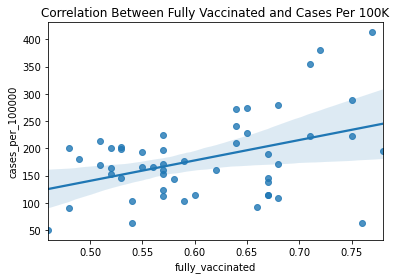

In [9]:
# use the function regplot to make a scatterplot
sns.regplot(y=df['cases_per_100000'], x=df['fully_vaccinated']).set_title("Correlation Between Fully Vaccinated and Cases Per 100K")
plt.show()

This means that there is a weak association between vaccination rate and *increased* number of cases.  

Below, the data show no meaningful correlation between vaccination rates and hospitalization and death rates. 

In [10]:
corr_vac_and_hospitalized=df['hospitalized_per_100000'].corr(df['fully_vaccinated'])
print("The correlation between vaccination rate and hospitalization rate is:  ", corr_vac_and_hospitalized)

The correlation between vaccination rate and hospitalization rate is:   0.2128437125507713


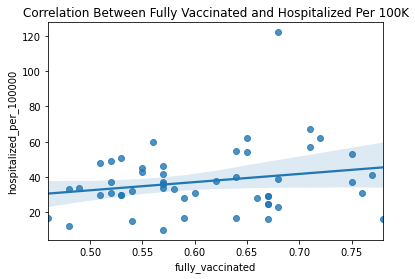

In [11]:
# use the function regplot to make a scatterplot
sns.regplot(y=df['hospitalized_per_100000'], x=df['fully_vaccinated']).set_title("Correlation Between Fully Vaccinated and Hospitalized Per 100K")
plt.show()

In [12]:
corr_vac_and_deaths=df['deaths_per_100000'].corr(df['fully_vaccinated'])
print("The correlation between vaccination rate and death rate is:  ",corr_vac_and_deaths)

The correlation between vaccination rate and death rate is:   0.06096962841484327


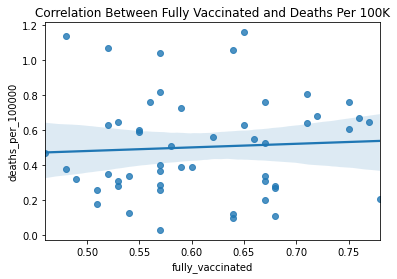

In [13]:
# use the function regplot to make a scatterplot
sns.regplot(y=df['deaths_per_100000'], x=df['fully_vaccinated']).set_title("Correlation Between Fully Vaccinated and Deaths Per 100K")
plt.show()